<a href="https://colab.research.google.com/github/mohamad-azrin/ADALL_github/blob/main/ADALL_Practical_Test_Revision_Regression_v2_27jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Practical Test Revision (Regression): Predicting Number of Failed Subjects

This notebook revises a **regression workflow** using a target that is a **special case**:

- Your target is a **count**: number of subjects failed (based on scores below **10** from **G1, G2, G3**).
- Because the target is an **integer count** (often 0, 1, 2, 3), it can *feel* similar to classification.
- However, you are still doing **regression** because the model outputs a **numeric value** and you evaluate using **regression metrics**.

## How to think about this target (important for revision)

| Perspective | What it means here | Typical choice |
|---|---|---|
| Regression view | Predict a numeric count (can be 0–3, but model can output non-integers) | MSE / MAE / RMSE, R² |
| Classification-like view (edge case) | If you convert counts into categories (e.g., 0 vs ≥1) you can classify | Accuracy, F1, ROC-AUC |

### Caveat you must remember
Even when the target behaves like classes, **do not switch to classification** unless the task explicitly asks you to do so.

## Practical test habits
- Keep code **readable** and **step-by-step**.
- Add short notes explaining **why** a step is needed.
- When unsure: print shapes, check missing values, and check your target distribution.

---


## Step 0) Setup

In [1]:
# Core libraries
import pandas as pd
import numpy as np
# Visualisation
import matplotlib.pyplot as plt
# Modelling and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


##Step 1) Load data and do quick checks

**Goal:** confirm you loaded the correct file, and the dataset looks sensible.

Checklist:
- Use `df.head()` to sanity check columns.
- Use `df.shape` to confirm rows and columns.
- Use `df.info()` to see dtypes and missing values quickly.

If anything looks odd (unexpected columns, too few rows), stop and fix it before modelling.


Data set provided to you
Read instruction
Just run the given cell ...
Downloaded to the folder on colab ..



In [2]:
# ------------------------------------------------------------
# LOAD DATA (do first)
# Tip: if this block is slow, run it early.
# ------------------------------------------------------------

import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("devansodariya/student-performance-data")
print("Downloaded to:", path)
print(os.listdir(path))

df = pd.read_csv(os.path.join(path, "student_data.csv"))
df.head()

Using Colab cache for faster access to the 'student-performance-data' dataset.
Downloaded to: /kaggle/input/student-performance-data
['student_data.csv']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


###Info about the dataset:

Student Performance Data was obtained in a survey of students' math course in secondary school.
It consists of 33 Column
Dataset Contains Features like:
```
school ID
gender
age
size of family
Father education
Mother education
Occupation of Father and Mother
Family Relation
Health
Grades
```

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### What you should write in markdown as you go

In a practical test, you are often graded on your reasoning, not just your code.

As you proceed, add short notes like:
- What does each key column represent in plain words?
- What is your target, and why is it defined this way?
- Is the dataset imbalanced? If yes, what is the impact on evaluation?
- What metric did you choose, and why?

Keep each explanation to **2 to 5 lines**.



##Step 2) Dataset profile (no charts yet)

**Why this matters:** In a practical test, you should be able to describe your dataset without relying on charts.

Focus on:
- which columns are numeric vs categorical,
- missing values (how many, where),
- target column (what type it is, what values it takes).

Write your observations as short bullet points in your report.


###Mock question (revision of steps you have already practised)

1. Create a text-based payload that clearly describes the dataset.
The description should summarise the dataset structure, key columns, size, and any notable data issues.

2. Then, send this payload to the OpenAI API together with:

>>clear context about the task, and
>>
>>a concise instruction telling the model what you want it to do with the dataset information.

The following block shows an example in image form for revision purposes.

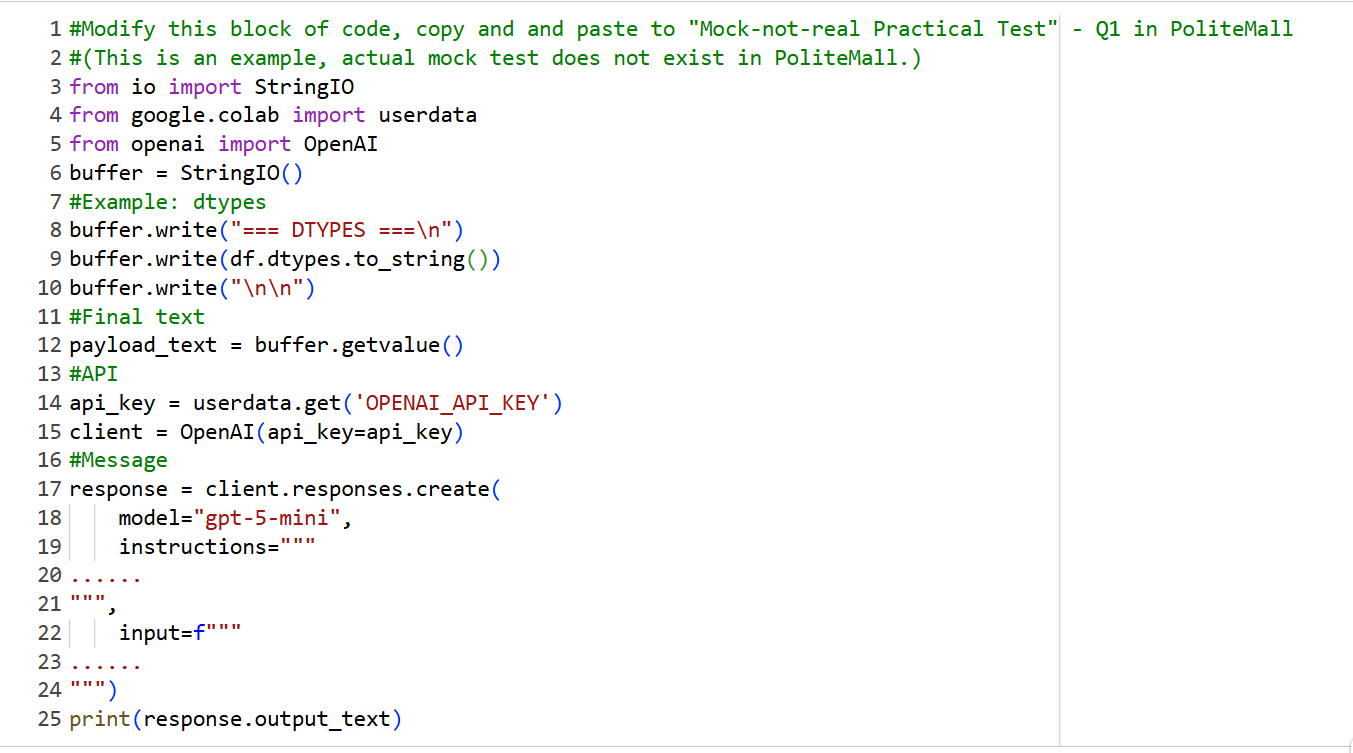

In [ ]:
#Example of solution, copy and pasted from previous practical.

In [3]:
import pandas as pd
import numpy as np
from io import StringIO

# ---------------------------
# Generate a full dataset profile
# ---------------------------

buffer = StringIO()

# dtypes
buffer.write("=== DTYPES ===\n")
buffer.write(df.dtypes.to_string())
buffer.write("\n\n")

# numeric describe
buffer.write("=== NUMERIC DESCRIBE ===\n")
buffer.write(df.describe().to_string())
buffer.write("\n\n")

# categorical describe
buffer.write("=== CATEGORICAL DESCRIBE ===\n")
try:
    buffer.write(df.describe(include='object').to_string())
except:
    buffer.write("No categorical columns")
buffer.write("\n\n")

# null summary
buffer.write("=== NULL SUMMARY ===\n")
null_summary = (
    df.isna().sum().to_frame("null_count")
    .assign(null_pct=lambda x: x["null_count"]/len(df))
)
buffer.write(null_summary.to_string())
buffer.write("\n\n")

# unique cardinality
buffer.write("=== UNIQUE VALUES PER COLUMN ===\n")
buffer.write(df.nunique().to_frame("unique_count").to_string())
buffer.write("\n\n")

# correlation matrix
buffer.write("=== CORRELATIONS (NUMERIC ONLY) ===\n")
buffer.write(df.corr(numeric_only=True).round(3).to_string())
buffer.write("\n\n")

# value counts for categoricals
buffer.write("=== VALUE COUNTS (TOP 20 PER CATEGORICAL COLUMN) ===\n")
cat_cols = df.select_dtypes(include='object').columns
if len(cat_cols) > 0:
    for col in cat_cols:
        buffer.write(f"\nColumn: {col}\n")
        vc = df[col].value_counts().head(20)
        buffer.write(vc.to_string())
        buffer.write("\n")
else:
    buffer.write("No categorical columns\n")
buffer.write("\n")

# --------- FIXED OUTLIER COMPUTATION (NO BOOLEANS) ---------
buffer.write("=== OUTLIER SUMMARY (IQR METHOD) ===\n")
num_cols = df.select_dtypes(include=['number']).columns  # exclude booleans
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5*IQR)) | (df[num_cols] > (Q3 + 1.5*IQR))).sum()
buffer.write(outliers.to_string())
buffer.write("\n\n")

# leakage scan: columns with all unique values
buffer.write("=== POSSIBLE LEAKAGE COLUMNS (UNIQUE FOR EACH ROW) ===\n")
leak_cols = df.columns[df.nunique() == len(df)]
buffer.write(str(list(leak_cols)))
buffer.write("\n\n")

# shape, duplicates, constant cols
buffer.write("=== SHAPE / DUPLICATES / CONSTANT COLUMNS ===\n")
dup_count = df.duplicated().sum()
constant_cols = df.columns[df.nunique() == 1].tolist()
buffer.write(f"Rows: {len(df)}, Columns: {df.shape[1]}\n")
buffer.write(f"Duplicate rows: {dup_count}\n")
buffer.write(f"Constant columns: {constant_cols}\n\n")

# Final text
payload_text = buffer.getvalue()

print(payload_text)


=== DTYPES ===
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64

=== NUMERIC DESCRIBE ===
              age        Medu        Fedu  traveltime   studytime    failures      famrel    freetime       goout        Dalc        Walc      health    absences          G1          G2          G3
count  395.000000  395.000000  395.000000  395.000000  395.000000  3

In [5]:
from google.colab import userdata
from openai import OpenAI

# Load key from Google Colab Secrets
api_key = userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key=api_key,
)

In [6]:
# This is important .... the instruction needs to be in detailed
response = client.responses.create(
    model="gpt-5-mini",
    instructions="""
You are an expert data scientist with extensive knowledge of tree-based models.
Always justify recommendations using reasoning trace based ONLY on the dataset profile.
""",
    input=f"""
Dataset info: {payload_text}\n
Questions:\n
1. Based on the dataset profile, what data quality issues should be resolved before modelling?
Provide a priority list and justify each item. \n
2. Which columns appear redundant, correlated, or likely to cause leakage?
Explain why each is problematic. \n
Next: Provide a python script to handle the identified issues.
Define one helper function for each issue.
Then define a wrapper function that calls these helper with true false option as user choice
Provide a single line of code to run the overall wrapper function.
Do not encode categorical columns or model first.
""")

print(response.output_text)


Below I first list the data-quality issues you should resolve before modelling (priority-ordered and justified using only the provided dataset profile). Then I list columns that look redundant, correlated or likely to cause leakage and why. Finally I provide a Python cleaning script with one helper function per identified issue and a wrapper that calls them based on boolean flags. The script does not encode categorical features or build a model.

1) Priority list of data-quality issues to resolve (with justification from profile)

Priority 1 — Remove or treat direct leakage (highest priority)
- Problem: G1 and G2 are previous-period grades, and they are very strongly correlated with the final grade G3 (corr G1-G3 = 0.801, G2-G3 = 0.905, G1-G2 = 0.852).
- Why fix: If the modelling objective is to predict G3 (final grade) from student attributes, including G1/G2 will leak future/near-future signal into training and inflate performance estimates. Remove or explicitly treat them depending 

###Mock question (quality of understanding): Review against the need for each recommendation.

**Sample answer**
1. Ok to remove duplicate if any.
2. G1 G2 G3 will be removed later.
3. Combining or reduction of predictors is not needed at this stage, not an issue for XGB.
4. Dropping outlier is premature at this stage, especially when we are interested in more special cases. [For example, age has outliers, but as we can observe later, older students had higher chance to failing subjects. It is a valid signal, not a noise.]

**Check in with your tutor, to see if your understanding is aligned with good practices of data science.**


##Step 3) Create the target: number of failed subjects (special target)

Here you convert **three subject grades** into **one target**:

- A subject is considered **failed** when grade `< 10`.
- You count how many of the three subjects are failed.

### Common mistakes to avoid
- Using `<= 10` by accident (that changes the definition).
- Counting missing values as fails (check for missing grades first).
- Forgetting to confirm the **range** of the new target (it should usually be 0–3).



##Step 4) Visual check of subject grades (G1, G2, G3)

**Purpose:** quickly see the grade distribution (0–20) for each subject.

What you should notice:
- Are grades skewed towards high or low?
- Are there many values below 10 (fails)?
- Are there weird values outside 0–20 (data quality issue)?

If there are values outside the expected range, you should investigate before modelling.


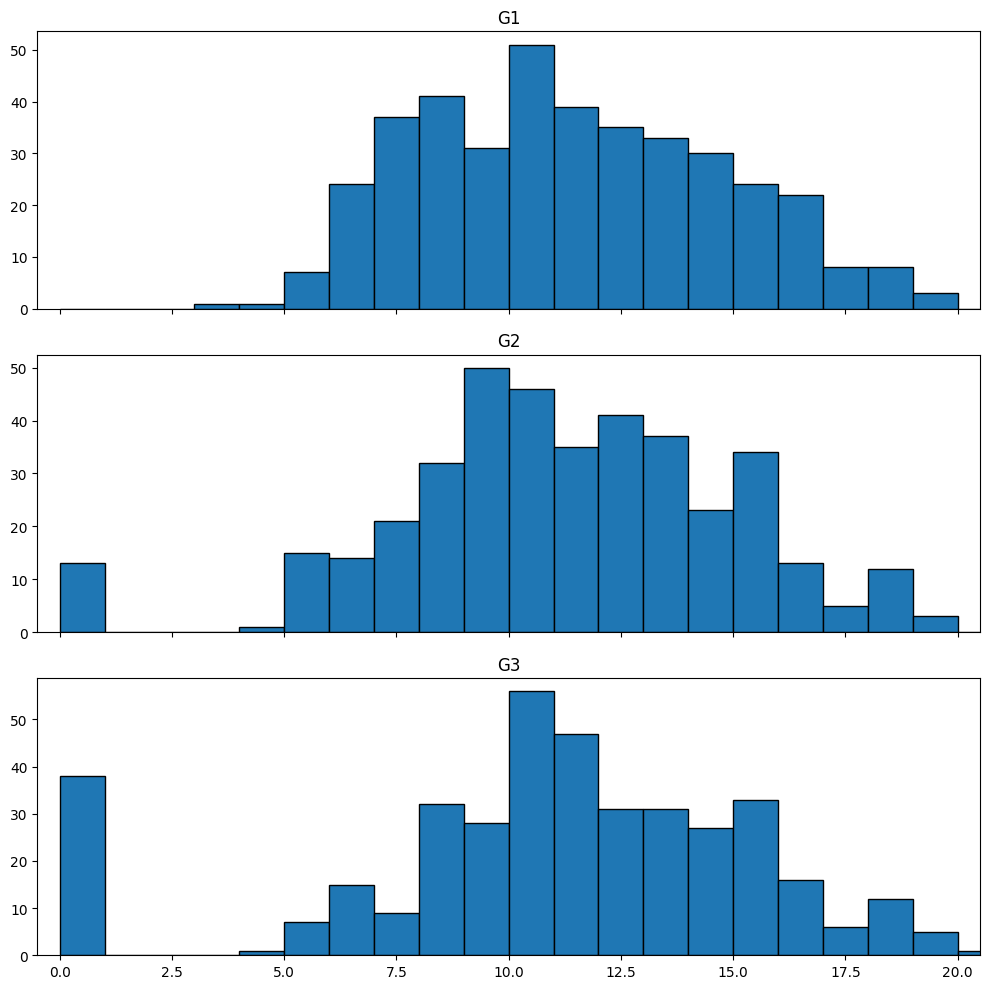

In [7]:
# ------------------------------------------------------------
# TARGET ENGINEERING (special case)
# Code for Step 3 and 4
# Target = count of failed subjects based on G1/G2/G3 < 10
# This is still REGRESSION (numeric target), but values are discrete.
# ------------------------------------------------------------

# --------------------------------------------
# Count number of subjects with score < 10
# from G1, G2, G3 (0 to 3)
# --------------------------------------------
grade_cols = ["G1", "G2", "G3"]

# True/False per subject, then sum across subjects (row-wise)
df["num_failed_subjects"] = (df[grade_cols] < 10).sum(axis=1)

# quick check
df[grade_cols + ["num_failed_subjects"]].head()
# --------------------------------------------
# Hist plots (3 by 1) for G1, G2, G3
# Use matplotlib only (no seaborn)
# --------------------------------------------
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True)

axs[0].hist(df["G1"].dropna(), bins=range(0, 22), edgecolor="black")
axs[0].set_title("G1")

axs[1].hist(df["G2"].dropna(), bins=range(0, 22), edgecolor="black")
axs[1].set_title("G2")

axs[2].hist(df["G3"].dropna(), bins=range(0, 22), edgecolor="black")
axs[2].set_title("G3")

for ax in axs:
    ax.set_xlim(-0.5, 20.5)

plt.tight_layout()
plt.show()

# Quick sanity check you should do (in your own notes/report):
# - What are the unique values of the target?
# - What is the proportion of 0, 1, 2, 3?
# This helps you understand if the dataset is imbalanced by count.

In [8]:
df["num_failed_subjects"] = (df[grade_cols] < 10).sum(axis=1)


##Step 5) Create the target: number of failed subjects (special target)

Here you convert **three subject grades** into **one target**:

- A subject is considered **failed** when grade `< 10`.
- You count how many of the three subjects are failed.

### Common mistakes to avoid
- Using `<= 10` by accident (that changes the definition).
- Counting missing values as fails (check for missing grades first).
- Forgetting to confirm the **range** of the new target (it should usually be 0–3).


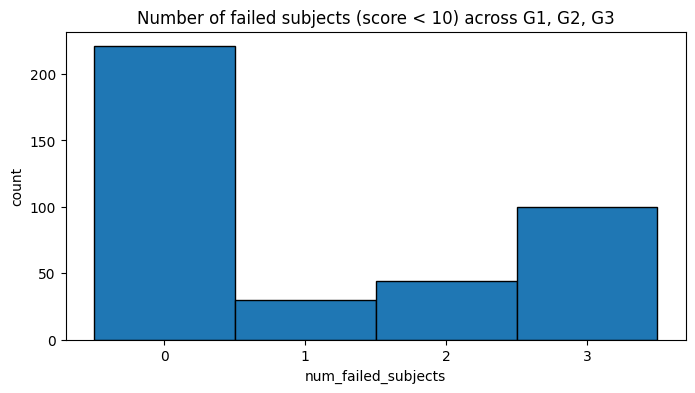

In [9]:
# ------------------------------------------------------------
# TARGET ENGINEERING (special case)
# Target = count of failed subjects based on G1/G2/G3 < 10
# This is still REGRESSION (numeric target), but values are discrete.
# ------------------------------------------------------------
# Optional: also plot the target distribution (0–3)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist(df["num_failed_subjects"].dropna(), bins=[-0.5, 0.5, 1.5, 2.5, 3.5], edgecolor="black")
plt.xticks([0, 1, 2, 3])
plt.title("Number of failed subjects (score < 10) across G1, G2, G3")
plt.xlabel("num_failed_subjects")
plt.ylabel("count")
plt.show()

# Quick sanity check you should do (in your own notes/report):
# - What are the unique values of the target?
# - What is the proportion of 0, 1, 2, 3?
# This helps you understand if the dataset is imbalanced by count.

###Useful code, for plotting predictors against categorical-type (including our count of subjects) prediction, to spot meaningful correlations and outliers.

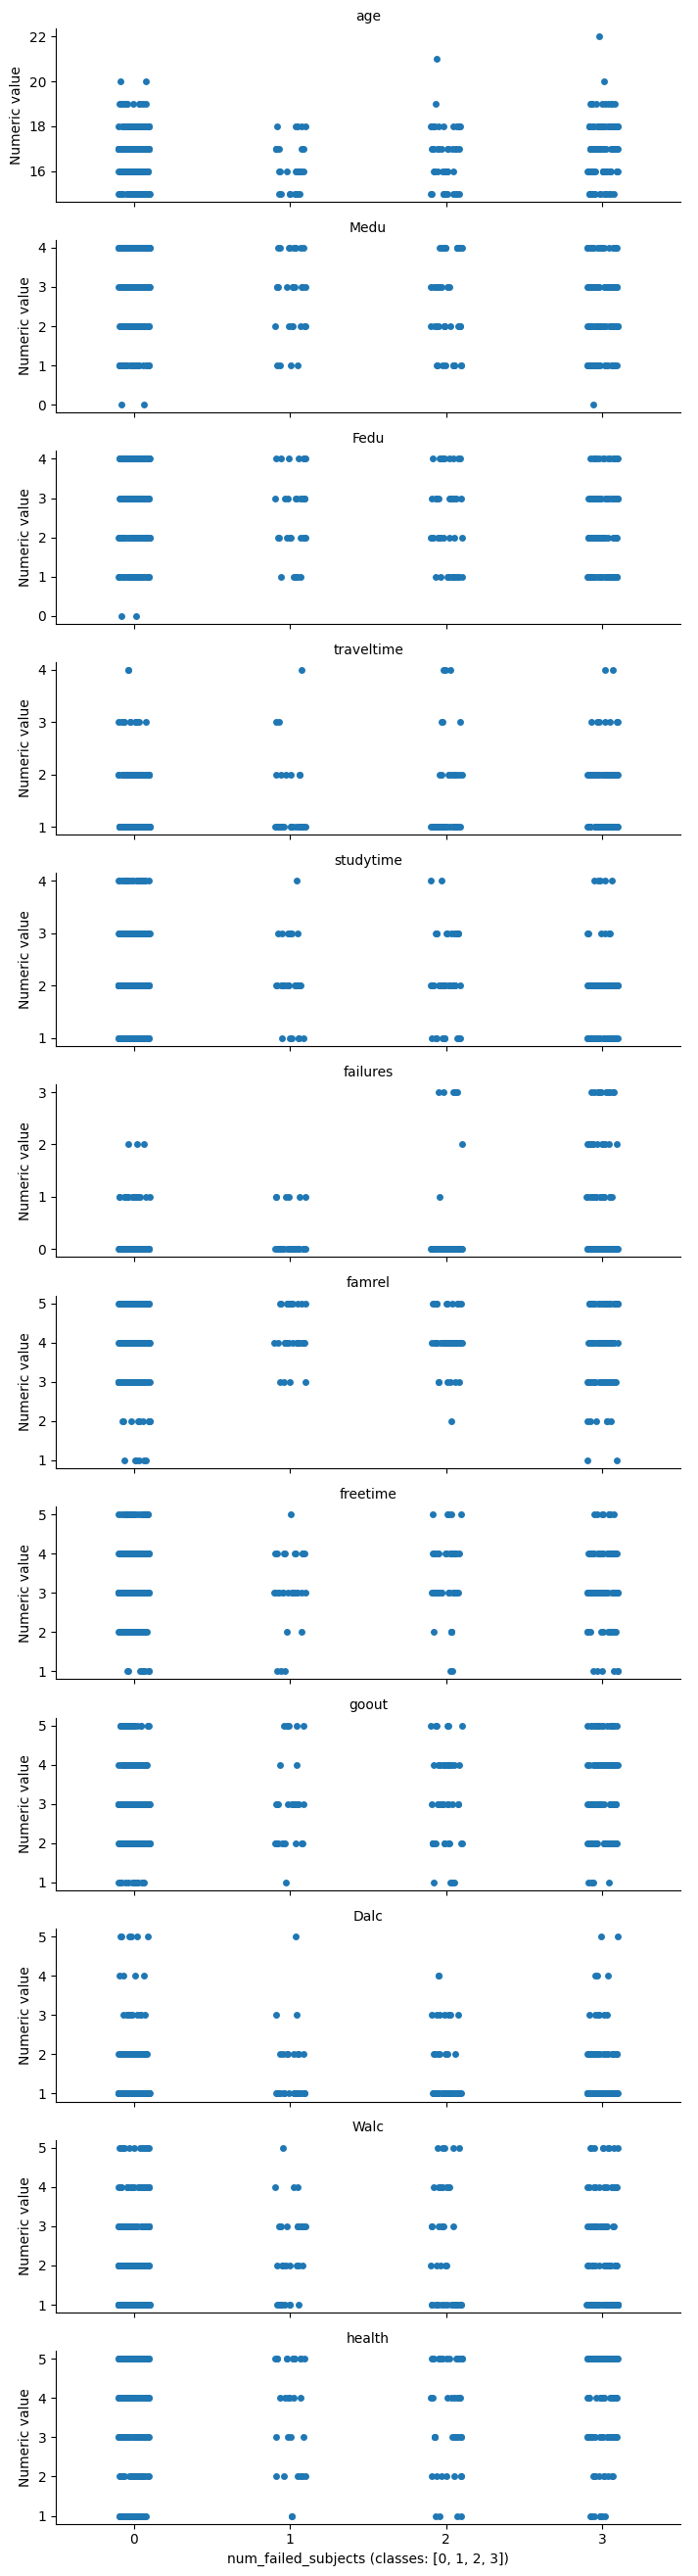

[0, 1, 2, 3] ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


In [10]:
# ============================================================
# Jitter plot: NUMERIC features vs DISCRETE target (fast)
# x = target classes, y = numeric values (one row facet per feature)
# ============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_numeric_fast(
    df: pd.DataFrame,
    target_col: str,
    num_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",  # "auto" | "sorted" | "freq"
    dropna_target: bool = True,
    dropna_feature: bool = True
):
    """
    Fast jitter plot for numeric features vs a discrete target.

    x = target classes
    y = numeric feature values (one facet per feature)

    Works for:
    - integer-coded targets (e.g. 0,1,2,3 or 1..5)
    - categorical/string targets (e.g. 'Low','Med','High')
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Auto-detect numeric columns (exclude target)
    if num_cols is None:
        num_cols = d.select_dtypes(include=[np.number]).columns.tolist()
        num_cols = [c for c in num_cols if c != target_col]

    # Keep only existing numeric columns
    num_cols = [c for c in num_cols if c in d.columns and c != target_col]
    if len(num_cols) == 0:
        raise ValueError("No numeric columns found to plot (after excluding target_col).")

    num_cols = num_cols[:max_features]

    # Decide x-axis order for target classes
    if order is None:
        y = d[target_col]

        # Ordered categorical: respect its category order (cap to max_classes)
        if isinstance(y.dtype, pd.CategoricalDtype) and y.dtype.ordered:
            order = list(y.cat.categories)
            if len(order) > max_classes:
                order = y.value_counts().head(max_classes).index.tolist()

        # Numeric target: prefer sorted unique (cap to max_classes)
        elif pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y.dropna())
            order = sorted(uniq.tolist())
            if len(order) > max_classes:
                order = sorted(y.value_counts().head(max_classes).index.tolist())

        # String / object target: most frequent classes
        else:
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()
            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order
            else:
                # auto: keep freq order
                order = order

    # Filter to chosen classes
    d = d[d[target_col].isin(order)].copy()

    # Sample once for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Long form
    frames = []
    for c in num_cols:
        tmp = d[[target_col, c]].copy()
        if dropna_feature:
            tmp = tmp.dropna(subset=[c])
        tmp = tmp.rename(columns={c: "value"})
        tmp["feature"] = c
        frames.append(tmp[[target_col, "feature", "value"]])

    long_df = pd.concat(frames, ignore_index=True)

    # Force target order in seaborn
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    g = sns.catplot(
        data=long_df,
        x=target_col,
        y="value",
        row="feature",
        kind="strip",
        order=order,
        jitter=True,
        height=2.2,
        aspect=3.2,
        sharey=False
    )

    g.set_axis_labels(f"{target_col} (classes: {order})", "Numeric value")
    g.set_titles("{row_name}")
    plt.tight_layout()
    plt.show()

    return order, num_cols


# Example:
order_used, num_cols_used = jitter_numeric_fast(df, target_col="num_failed_subjects", sample=15000)
print(order_used, num_cols_used)


In [ ]:
# ============================================================
# Jitter plot: CATEGORICAL features vs DISCRETE target (fast)
# x = target classes, y = category levels (one row facet per feature)
# ============================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def jitter_categorical_fast(
    df: pd.DataFrame,
    target_col: str,
    cat_cols: list[str] | None = None,
    order: list | None = None,
    max_features: int = 12,
    sample: int | None = 8000,
    max_classes: int = 12,
    class_order: str = "auto",      # "auto" | "sorted" | "freq"
    dropna_target: bool = True,
    top_k: int = 15,                # keep top categories per feature, rest -> "Other"
    dropna_feature: bool = False,   # if False, show missing as "(Missing)"
    missing_label: str = "(Missing)",
    show_other: bool = True
):
    """
    Fast jitter plot for categorical features vs a discrete target.

    x = target classes
    y = categorical feature levels (one facet per feature)

    Notes:
    - For each categorical feature, rare categories are collapsed into "Other" (top_k kept).
    - Missing can be shown explicitly as missing_label.
    """

    if target_col not in df.columns:
        raise KeyError(f"target_col='{target_col}' not found in df")

    d = df.copy()

    # Drop missing target (usually safest)
    if dropna_target:
        d = d.dropna(subset=[target_col])

    # Decide x-axis order for target classes
    if order is None:
        y = d[target_col]

        if isinstance(y.dtype, pd.CategoricalDtype) and y.dtype.ordered:
            order = list(y.cat.categories)
            if len(order) > max_classes:
                order = y.value_counts().head(max_classes).index.tolist()

        elif pd.api.types.is_numeric_dtype(y):
            uniq = pd.unique(y.dropna())
            order = sorted(uniq.tolist())
            if len(order) > max_classes:
                order = sorted(y.value_counts().head(max_classes).index.tolist())

        else:
            vc = y.astype("object").value_counts(dropna=False)
            order = vc.head(max_classes).index.tolist()
            if class_order == "sorted":
                order = sorted(order)
            elif class_order == "freq":
                order = order
            else:
                order = order

    # Filter to chosen classes
    d = d[d[target_col].isin(order)].copy()

    # Sample once for speed
    if sample is not None and len(d) > sample:
        d = d.sample(sample, random_state=42)

    # Auto-detect categorical columns
    if cat_cols is None:
        cat_cols = d.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
        cat_cols = [c for c in cat_cols if c != target_col]

    cat_cols = [c for c in cat_cols if c in d.columns and c != target_col]
    if len(cat_cols) == 0:
        raise ValueError("No categorical columns found to plot (after excluding target_col).")

    cat_cols = cat_cols[:max_features]

    # Build long form with per-feature top_k collapsing
    frames = []
    for c in cat_cols:
        tmp = d[[target_col, c]].copy()

        if dropna_feature:
            tmp = tmp.dropna(subset=[c])
            tmp[c] = tmp[c].astype("object")
        else:
            tmp[c] = tmp[c].astype("object").fillna(missing_label)

        # Collapse rare categories to Other
        vc = tmp[c].value_counts(dropna=False)
        keep = vc.head(top_k).index.tolist()

        if show_other:
            tmp[c] = tmp[c].where(tmp[c].isin(keep), other="Other")
            # Make a stable y-order: keep list + "Other" (if present)
            y_order = [k for k in keep if k in tmp[c].unique()]
            if "Other" in tmp[c].unique() and "Other" not in y_order:
                y_order.append("Other")
        else:
            tmp = tmp[tmp[c].isin(keep)].copy()
            y_order = [k for k in keep if k in tmp[c].unique()]

        tmp = tmp.rename(columns={c: "value"})
        tmp["feature"] = c
        tmp["_y_order"] = [y_order] * len(tmp)
        frames.append(tmp[[target_col, "feature", "value", "_y_order"]])

    long_df = pd.concat(frames, ignore_index=True)

    # Force target order in seaborn
    long_df[target_col] = pd.Categorical(long_df[target_col], categories=order, ordered=True)

    # Faceted strip plot. We cannot pass a different y-order per facet directly,
    # so we do a small loop to respect each feature's y-order.
    features = long_df["feature"].unique().tolist()
    n = len(features)

    fig, axes = plt.subplots(n, 1, figsize=(12, max(2.2 * n, 2.2)), sharex=True)
    if n == 1:
        axes = [axes]

    for ax, feat in zip(axes, features):
        sub = long_df[long_df["feature"] == feat].copy()
        y_order = sub["_y_order"].iloc[0]

        sns.stripplot(
            data=sub,
            x=target_col,
            y="value",
            order=order,
            jitter=True,
            size=3,
            ax=ax
        )

        ax.set_title(feat)
        ax.set_ylabel("Category")
        ax.set_xlabel("")
        ax.set_yticks(range(len(y_order)))
        ax.set_yticklabels(y_order)

    axes[-1].set_xlabel(f"{target_col} (classes: {order})")
    plt.tight_layout()
    plt.show()

    return order, cat_cols


# Example:
order_used, cat_cols_used = jitter_categorical_fast(df, target_col="num_failed_subjects", sample=15000, top_k=12)
print(order_used, cat_cols_used)


### What to look for in quick checks

Standard checks you should be able to explain:
- `df.shape`: how many rows and columns (scale)
- `df.info()`: data types and missing values (readiness)
- `df.describe(include="all")`: typical values, outliers, rare categories (risk)

Common edge cases:
- `0` might mean a real value, or it might mean *missing coded as 0* (depends on the dataset).
- Some columns look numeric but are actually IDs or codes. Treat those carefully.


In [11]:
# Class balance (important for evaluation choices)
target_col = "num_failed_subjects"
df[target_col].value_counts(normalize=True)

,proportion
num_failed_subjects,
0,0.559494
3,0.253165
2,0.111392
1,0.075949


In [12]:
X = df.drop(columns=[target_col, "G2", "G3", "G1"])
y = df[target_col]
X.shape, y.shape

((395, 30), (395,))


##Step 6) Split into train and test sets

**Goal:** ensure you evaluate on unseen data.

Revision reminders:
- Use the same `random_state` for reproducibility.
- For regression, you usually do **not** stratify (unless you bucket the target).
- Keep the test set untouched until final evaluation.


In [13]:
# ------------------------------------------------------------
# TRAIN / TEST SPLIT
# Keep the test set for final evaluation only.
# ------------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    random_state=42,
    stratify=y  # important for imbalanced
)

In [14]:
#value count for y_train and y_test
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


num_failed_subjects
0    0.560563
3    0.253521
2    0.109859
1    0.076056
Name: proportion, dtype: float64
num_failed_subjects
0    0.550
3    0.250
2    0.125
1    0.075
Name: proportion, dtype: float64


### Train/test split: what you are protecting against

**Standard definition:**  
A train/test split separates data you learn from (train) and data you hold back for final checking (test). This helps you estimate how well the model will work on new cases.

**Why `stratify=y` matters:**  
If classes are imbalanced, stratification keeps the class ratios similar in train and test.

**Edge case:**  
If a class is extremely rare, stratified splitting can fail or create tiny class counts. In that case, you may need a different split strategy or simpler target grouping.



##Step 7) Preprocessing (critical for mixed columns)

Most real datasets contain both:
- numeric columns (need scaling sometimes, missing values handling)
- categorical columns (need encoding, missing values handling)

**Tip:** In a practical test, a clean `ColumnTransformer` + `Pipeline` is often the best answer because:
- it reduces leakage,
- it ensures the same steps apply to train and test,
- it makes your workflow reproducible.


In [15]:
# ------------------------------------------------------------
# PREPROCESSOR
# Make sure preprocessing is inside a Pipeline to avoid leakage.
# ------------------------------------------------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Identify columns by dtype
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
    ],
    remainder="drop"
)

num_features[:10], cat_features[:10]


(['age',
  'Medu',
  'Fedu',
  'traveltime',
  'studytime',
  'failures',
  'famrel',
  'freetime',
  'goout',
  'Dalc'],
 ['school',
  'sex',
  'address',
  'famsize',
  'Pstatus',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'schoolsup'])

In [16]:
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
242,GP,M,16,U,LE3,T,4,3,teacher,other,...,yes,yes,no,5,4,5,1,1,3,0
70,GP,M,16,U,GT3,T,3,1,other,other,...,yes,yes,no,4,3,2,1,1,5,0
25,GP,F,16,U,GT3,T,2,2,services,services,...,yes,yes,no,1,2,2,1,3,5,14
351,MS,M,17,U,GT3,T,3,3,health,other,...,yes,yes,no,4,5,4,2,3,3,2
104,GP,M,15,U,GT3,A,3,4,services,other,...,yes,yes,no,5,4,4,1,1,1,0



##Step 8) Build a model pipeline

**Revision goal:** You should be able to explain:
- What the preprocessor does
- What the model does
- Why a pipeline prevents mistakes

### Special note for this target
Even though the true target is a small set of integers, your regression model might output non-integers.
That is normal.

If the task requires integer predictions, you can *post-process* predictions (rounding),
but only do this if instructed, and always state the trade-off (it can change metrics).

### Evaluate using regression metrics

In a practical test, explain metrics in simple terms:

- **MAE**: average absolute error (easy to explain in grade points)
- **RMSE**: penalises large errors more strongly
- **R²**: how much variance is explained (can be misleading if target range is small)

### Edge case reminder
Because your target range is small (often 0–3), R² may look low even if errors are small.
So you should always report MAE or RMSE too.


In [17]:
# ------------------------------------`
# 0. NOTE: This block takes quite a while to run, do it before moving onto explanation of code
# ------------------------------------

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# -------------------------------------------
# 1. Create pipelines for both models
# -------------------------------------------

pipe_rf = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

pipe_xgb = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        random_state=42))
])

# -------------------------------------------
# 2. Define parameter grids
# Keep them small for speed and simplicity
# -------------------------------------------

param_grid_rf = {
  "regressor__n_estimators": [50, 200],
  'regressor__max_depth':[5,10, None],
  'regressor__criterion':['squared_error', 'absolute_error']
}

param_grid_xgb = {
    "regressor__n_estimators": [50, 200],
  'regressor__max_depth':[2,4,6],
  'regressor__eval_metric':['rmse', 'mae']
}

# -------------------------------------------
# 3. Create GridSearchCV objects
# -------------------------------------------

gs_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

gs_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid_xgb,
    cv=cv,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1
)

# -------------------------------------------
# 4. Fit both models
# (Students can run one at a time if needed)
# -------------------------------------------e

gs_rf.fit(X_train, y_train)
print("Random Forest grid search complete.")

gs_xgb.fit(X_train, y_train)
print("XGBoost grid search complete.")


Fitting 10 folds for each of 12 candidates, totalling 120 fits
Random Forest grid search complete.
Fitting 10 folds for each of 12 candidates, totalling 120 fits
XGBoost grid search complete.


In [18]:
#setup a results df to hold training and test scores
#at this point, you should already decide what scoring metric you going to use
#regression: r2, mae, rmse, mape

#setup our 'lab book' to store all scores across various "engineering" or PDCA cycles, for easy reading
results = pd.DataFrame(['cv_mae_val', 'cv_std_val', 'cv_mae_train', 'cv_std_train','holdout_mae','best para'])

In [19]:
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_validate

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# -----------------------------------------
# 1) CV diagnostics on TRAIN only
#    cross_validate gives train_score and test_score
# -----------------------------------------
best_model = gs_xgb.best_estimator_

cv_out = cross_validate(
    best_model,
    X_train, y_train,
    cv=cv,
    scoring="neg_mean_absolute_error",
    return_train_score=True,
    n_jobs=-1,
    error_score="raise"
)

# Convert negative MAE to positive MAE
val_mae_scores = -cv_out["test_score"]
train_mae_scores = -cv_out["train_score"]

cv_mae_val_mean = float(val_mae_scores.mean())
cv_mae_val_std  = float(val_mae_scores.std())

cv_mae_train_mean = float(train_mae_scores.mean())
cv_mae_train_std  = float(train_mae_scores.std())

# -----------------------------------------
# 2) Holdout MAE (fit once, evaluate once)
# -----------------------------------------
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
holdout_mae = float(np.mean(np.abs(y_test - y_pred)))

# -----------------------------------------
# 3) Save into results (same 6-row lab book)
# -----------------------------------------
results["XGB_llm_encode_tuned"] = [
    cv_mae_val_mean,
    cv_mae_val_std,
    cv_mae_train_mean,
    cv_mae_train_std,
    holdout_mae,
    gs_xgb.best_params_,
]

display(results)


,0,XGB_llm_encode_tuned
0,cv_mae_val,1.000142
1,cv_std_val,0.072501
2,cv_mae_train,0.675758
3,cv_std_train,0.025958
4,holdout_mae,1.058504
5,best para,"{'regressor__eval_metric': 'rmse', 'regressor_..."


### Grid search and CV: what to do if time is tight

**Standard definition:**  
Cross-validation (CV) repeats training on different splits to reduce “lucky/unlucky split” effects. Grid search tries multiple hyperparameter settings.

**Practical-test approach (recommended):**
1. Build a baseline model and report results.
2. Improve **one thing only** (for example: class weighting, simpler preprocessing, or a small grid).

If you run the full grid search, note the runtime and what you would do to speed it up.



##Step 9) Error analysis (what to look for)

When you plot predictions or residuals, check:

- Do you systematically over-predict or under-predict?
- Are errors bigger for certain ranges (e.g., predicting 2 or 3 fails)?
- Do you see outliers that might come from data issues?

This is where you decide what to improve next.


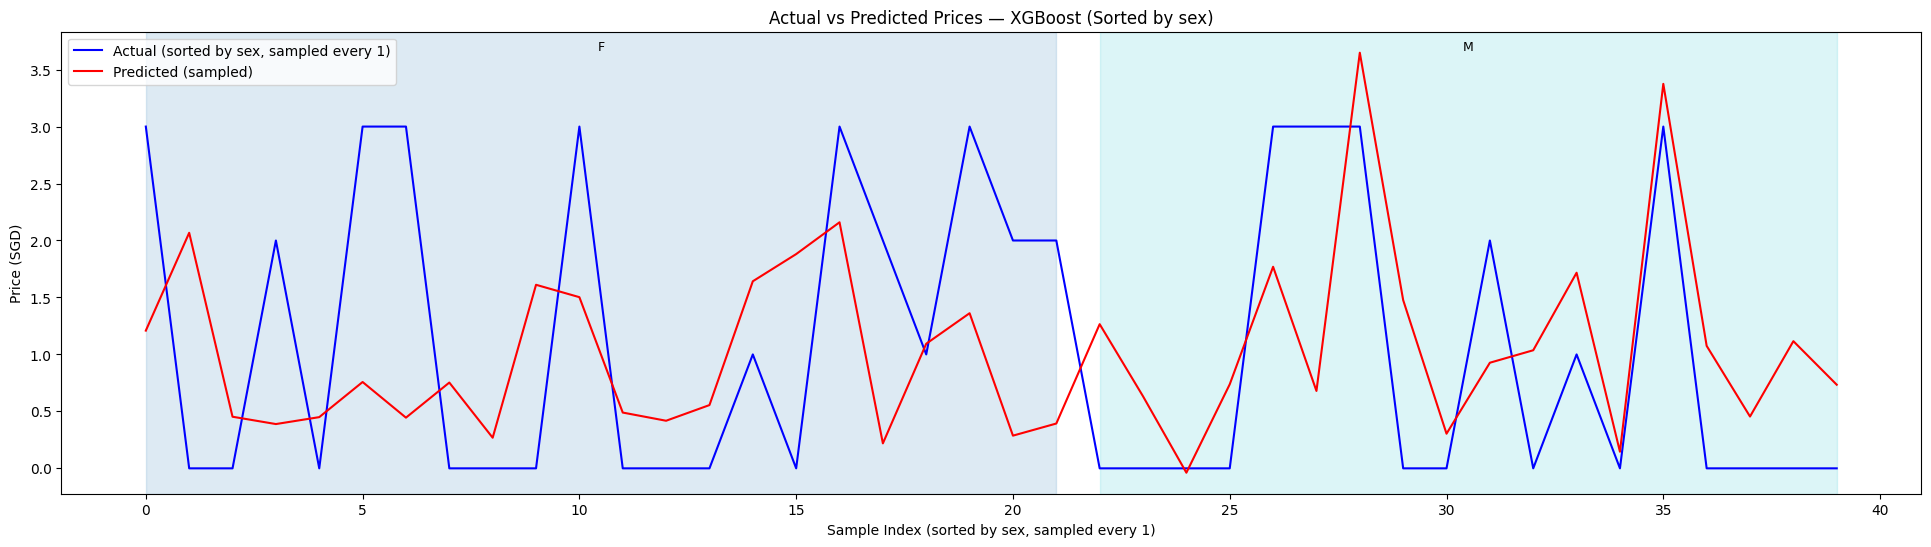

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# USER SETTINGS (edit these only)
# -----------------------------------------
sort_col = "sex"   # any column in X_test (e.g. "Brand", "GPU", "Screen_Size_inch")
step_n  = 1         # sample every n-th row after sorting

# -----------------------------------------
# 1. Sort by chosen column
# -----------------------------------------
sorted_idx = X_test[sort_col].sort_values().index

X_sorted = X_test.loc[sorted_idx]
y_sorted = y_test.loc[sorted_idx]

# 🔄 XGBoost prediction instead of RF
y_pred_sorted = gs_xgb.best_estimator_.predict(X_sorted)

# Combine into one DataFrame
df_plot = X_sorted.copy()
df_plot["Actual"] = y_sorted.values
df_plot["Predicted"] = y_pred_sorted

# -----------------------------------------
# 2. Apply sampling with iloc[::step_n]
# -----------------------------------------
df_plot = df_plot.iloc[::step_n].reset_index(drop=True)

group_series = df_plot[sort_col]
unique_groups = group_series.unique()

# colour palette based on unique groups
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_groups)))

# Find spans for shading
spans = []
start = 0
for i in range(1, len(group_series)):
    if group_series[i] != group_series[i - 1]:
        spans.append((start, i - 1, group_series[i - 1]))
        start = i
spans.append((start, len(group_series) - 1, group_series.iloc[-1]))

# -----------------------------------------
# 3. Plot with shading + sampled lines
# -----------------------------------------
fig, ax = plt.subplots(figsize=(24, 6))

# Background shading (color spelling is correct)
for idx, (s, e, group_name) in enumerate(spans):
    ax.axvspan(s, e, color=colors[idx % len(colors)], alpha=0.15)

# Actual values
ax.plot(
    df_plot["Actual"].values,
    label=f"Actual (sorted by {sort_col}, sampled every {step_n})",
    color="blue"
)

# Predicted values (XGBoost)
ax.plot(
    df_plot["Predicted"].values,
    label="Predicted (sampled)",
    color="red"
)

ax.set_title(f"Actual vs Predicted Prices — XGBoost (Sorted by {sort_col})")
ax.set_xlabel(f"Sample Index (sorted by {sort_col}, sampled every {step_n})")
ax.set_ylabel("Price (SGD)")
ax.legend()

# Group labels
for idx, (s, e, group_name) in enumerate(spans):
    ax.text(
        (s + e) / 2,
        ax.get_ylim()[1] * 0.98,
        str(group_name),
        ha="center",
        va="top",
        fontsize=9
    )

plt.show()


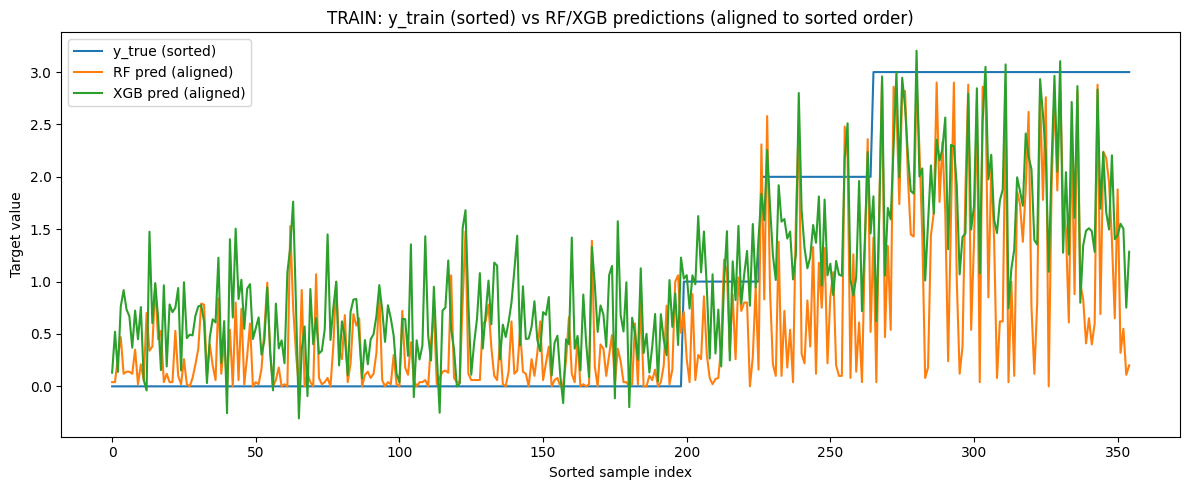

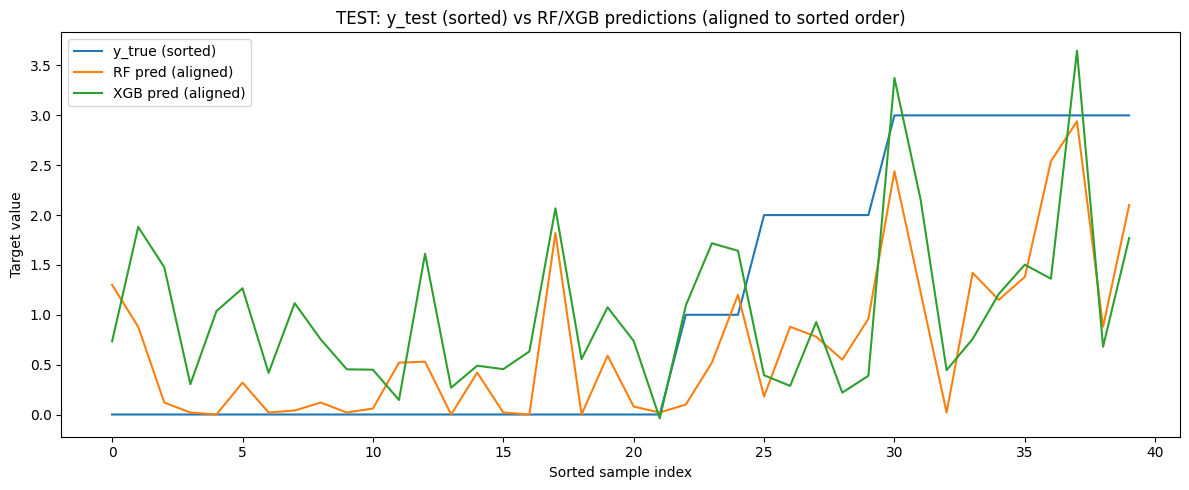

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Helper: plot y_true sorted, with y_pred aligned to same order
# ------------------------------------------------------------
def plot_sorted_true_vs_pred(y_true, y_pred_dict, title, xlabel="Sorted sample index"):
    """
    y_true: 1D array-like
    y_pred_dict: dict of {label: y_pred (1D array-like)}
    """
    y_true = np.asarray(y_true).ravel()

    order = np.argsort(y_true)          # indices that would sort y_true
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_true_sorted, label="y_true (sorted)")

    for label, y_pred in y_pred_dict.items():
        y_pred = np.asarray(y_pred).ravel()
        plt.plot(y_pred[order], label=f"{label} pred (aligned)")

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Target value")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# 1) Get predictions for TRAIN and TEST for both models
# ------------------------------------------------------------
rf_train_pred  = gs_rf.best_estimator_.predict(X_train)
xgb_train_pred = gs_xgb.best_estimator_.predict(X_train)

rf_test_pred   = gs_rf.best_estimator_.predict(X_test)
xgb_test_pred  = gs_xgb.best_estimator_.predict(X_test)


# ------------------------------------------------------------
# 2) Plot TRAIN: y_train sorted + aligned preds
# ------------------------------------------------------------
plot_sorted_true_vs_pred(
    y_true=y_train,
    y_pred_dict={
        "RF": rf_train_pred,
        "XGB": xgb_train_pred
    },
    title="TRAIN: y_train (sorted) vs RF/XGB predictions (aligned to sorted order)"
)


# ------------------------------------------------------------
# 3) Plot TEST: y_test sorted + aligned preds
# ------------------------------------------------------------
plot_sorted_true_vs_pred(
    y_true=y_test,
    y_pred_dict={
        "RF": rf_test_pred,
        "XGB": xgb_test_pred
    },
    title="TEST: y_test (sorted) vs RF/XGB predictions (aligned to sorted order)"
)


### Early stopping (XGBoost): what it is and why it needs a validation set

**Standard definition:**  
Early stopping stops training when performance on a validation set stops improving, helping to reduce overfitting.

**Important caveat:**  
If you use early stopping, you need a validation set that is not used for fitting the final model at that moment. This is why the notebook creates `X_val, y_val`.

**Alternate interpretation:**  
Some workflows use CV with early stopping inside each fold, but that is more complex and slower. In a practical test, a single validation split is usually enough.



##Step 10) Model improvement (only if time allows)

In a practical test, you only do tuning if it is explicitly requested or you have enough time.

If you tune:
- keep the parameter grid small and sensible
- record best parameters
- re-evaluate on the test set once

**Do not** repeatedly test on the test set. That becomes leakage.


In [24]:
# ------------------------------------------------------------
# TRAIN / TEST SPLIT
# Keep the test set for final evaluation only.
# ------------------------------------------------------------

%%time
# ============================
# XGBOOST REGRESSION TUNING (GridSearchCV with ShuffleSplit, MAE) + FINAL EARLY STOPPING (single block)
# ============================

import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

from xgboost import XGBRegressor

# ----------------------------
# 0) Hold-out validation ONLY for final early stopping
# ----------------------------
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,
    random_state=42
)

# ----------------------------
# 1) CV: ShuffleSplit (test_size=0.1)
# ----------------------------
cv = ShuffleSplit(n_splits=5, test_size=0.1, random_state=42)

# ----------------------------
# 2) Pipeline: smaller n_estimators for tuning speed
# ----------------------------
pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        random_state=42,
        objective="reg:squarederror",
        tree_method="hist",
        n_jobs=-1,
        n_estimators=200,     # keep modest during GridSearch
        eval_metric="mae"
    ))
])

# ----------------------------
# 3) GridSearch: simple, sensible grid for "most hyperparameters"
#    (keep it small to avoid exploding runtime)
# ----------------------------
param_grid = {
    "regressor__learning_rate": [0.03, 0.05, 0.1],
    "regressor__max_depth": [2, 3, 5],
    "regressor__min_child_weight": [1, 5],
    "regressor__subsample": [0.8, 1.0],
    "regressor__colsample_bytree": [0.8, 1.0],
    "regressor__reg_lambda": [1.0, 5.0],
}

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="neg_mean_absolute_error",  # MAE (negated because higher-is-better convention)
    cv=cv,
    refit=True,
    n_jobs=-1,
    verbose=1
)

# ----------------------------
# 4) Fit GridSearch on X_tr only
# ----------------------------
gs.fit(X_tr, y_tr)

print("\nGridSearch tuning complete.")
print("Best params:", gs.best_params_)
print("Best CV MAE:", -gs.best_score_)

# ----------------------------
# 5) Final refit with early stopping (based on X_val)
# ----------------------------
best_pipe = gs.best_estimator_
preproc = best_pipe.named_steps["preprocessor"]
best_xgb = best_pipe.named_steps["regressor"]

X_tr_p = preproc.fit_transform(X_tr)
X_val_p = preproc.transform(X_val)
X_test_p = preproc.transform(X_test)

final_params = best_xgb.get_params()
final_params["n_estimators"] = 5000
final_params["eval_metric"] = "mae"
final_params["early_stopping_rounds"] = 100

xgb_final = XGBRegressor(**final_params)
xgb_final.fit(
    X_tr_p, y_tr,
    eval_set=[(X_val_p, y_val)],
    verbose=False
)

# ----------------------------
# 6) Predict using best_iteration when available
# ----------------------------
best_iter = getattr(xgb_final, "best_iteration", None)

if best_iter is not None:
    y_pred = xgb_final.predict(X_test_p, iteration_range=(0, best_iter + 1))
else:
    # Fallback: use all boosted rounds (still OK, just not "best iteration" forced)
    y_pred = xgb_final.predict(X_test_p)

# Optional rounding if target is discrete (e.g. 0..3)
y_pred_round = np.clip(np.rint(y_pred), 0, 3)

print("\nEarly stopping check:")
print("best_iteration:", getattr(xgb_final, "best_iteration", None))
try:
    booster = xgb_final.get_booster()
    print("num_boosted_rounds:", booster.num_boosted_rounds())
except Exception as e:
    print("Could not read booster rounds:", repr(e))

print("\nTEST metrics (raw predictions):")
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("R^2 :", r2_score(y_test, y_pred))

print("\nTEST metrics (rounded to 0..3, optional):")
print("MAE :", mean_absolute_error(y_test, y_pred_round))
print("RMSE:", root_mean_squared_error(y_test, y_pred_round))
print("R^2 :", r2_score(y_test, y_pred_round))


Fitting 5 folds for each of 144 candidates, totalling 720 fits

GridSearch tuning complete.
Best params: {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.03, 'regressor__max_depth': 5, 'regressor__min_child_weight': 1, 'regressor__reg_lambda': 1.0, 'regressor__subsample': 0.8}
Best CV MAE: 1.1079825401306151

Early stopping check:
best_iteration: 90
num_boosted_rounds: 191

TEST metrics (raw predictions):
MAE : 0.9823770523071289
RMSE: 1.120409607887268
R^2 : 0.24803131818771362

TEST metrics (rounded to 0..3, optional):
MAE : 1.0
RMSE: 1.1832159757614136
R^2 : 0.16136282682418823
CPU times: user 3.01 s, sys: 142 ms, total: 3.15 s
Wall time: 1min 1s


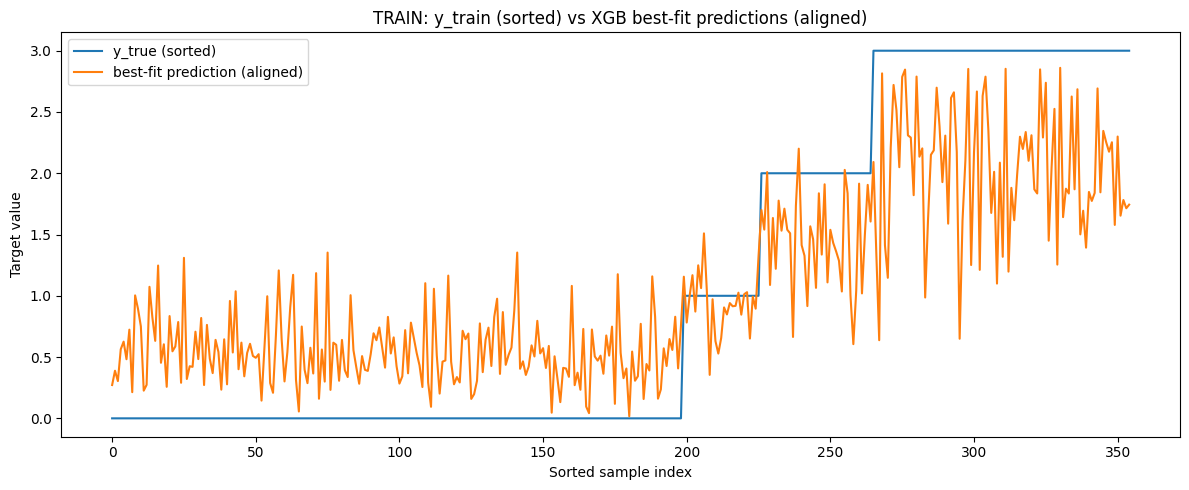

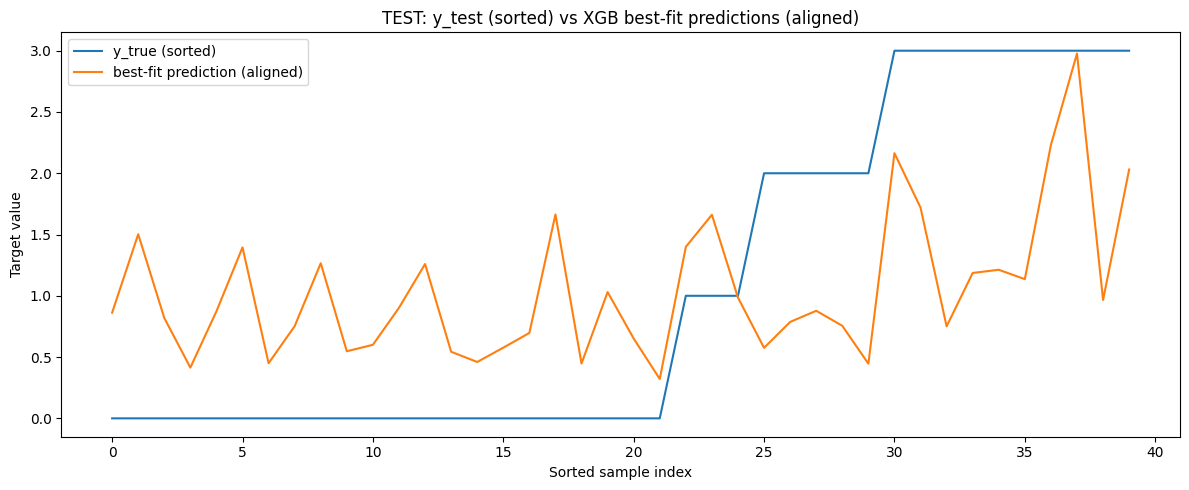

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Helper: plot y_true sorted, with y_pred aligned to same order
# ------------------------------------------------------------
def plot_sorted_true_vs_pred(y_true, y_pred, title, xlabel="Sorted sample index"):
    y_true = np.asarray(y_true).ravel()
    y_pred = np.asarray(y_pred).ravel()

    order = np.argsort(y_true)
    y_true_sorted = y_true[order]

    plt.figure(figsize=(12, 5))
    plt.plot(y_true_sorted, label="y_true (sorted)")
    plt.plot(y_pred[order], label="best-fit prediction (aligned)")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Target value")
    plt.legend()
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# ASSUMES you already ran the fast XGB block above and now have:
# - xgb_final (final early-stopped XGB)
# - preproc   (fitted preprocessor used for xgb_final)
# - X_train, X_test, y_train, y_test
# ------------------------------------------------------------

# Preprocess for xgb_final
X_train_p = preproc.transform(X_train)
X_test_p  = preproc.transform(X_test)

# Best-iteration prediction (version-safe)
best_iter = getattr(xgb_final, "best_iteration", None)
best_ntree_limit = getattr(xgb_final, "best_ntree_limit", None)

if best_iter is not None:
    train_pred = xgb_final.predict(X_train_p, iteration_range=(0, best_iter + 1))
    test_pred  = xgb_final.predict(X_test_p,  iteration_range=(0, best_iter + 1))
elif best_ntree_limit is not None:
    train_pred = xgb_final.predict(X_train_p, ntree_limit=best_ntree_limit)
    test_pred  = xgb_final.predict(X_test_p,  ntree_limit=best_ntree_limit)
else:
    train_pred = xgb_final.predict(X_train_p)
    test_pred  = xgb_final.predict(X_test_p)

# ------------------------------------------------------------
# Plot TRAIN and TEST using best-fit predictions only
# ------------------------------------------------------------
plot_sorted_true_vs_pred(
    y_true=y_train,
    y_pred=train_pred,
    title="TRAIN: y_train (sorted) vs XGB best-fit predictions (aligned)"
)

plot_sorted_true_vs_pred(
    y_true=y_test,
    y_pred=test_pred,
    title="TEST: y_test (sorted) vs XGB best-fit predictions (aligned)"
)